# Development Trends in DC

## Project Summary

### Our goal with this project is to explore the trend of redevelopment and its outcomes in DC. We will do this by examining specific land use, areas undergoing redevelopment, and affordable units avabilable. This is important because we want to learn what land is being used for in DC and if there are affordable units available. Our results will show the overall trends in the redevelopment in DC and if there is afforable units within those areas being developed. 

## Data

### All datasets are from Open Data DC. The first data set is on existing land use in DC. It records the land used for now and what the land was used before. We decided to use this dataset to make a comparison and find out the interesting trend behind the redevelopment. The second data set is on WDECP (Washington DC Economic Partnership) redevelopement in DC. We decided to use this dataset to see the trends in development plans in DC. The last dataset we used was on affordable housing in DC. We chose this dataset to see the plans in affordable housing development and the amount of affordable units available.

## Explore the Trend of Redevelopment
#### Geting Trend from Existing Land Use in DC AREA
#### Source data: https://opendata.dc.gov/datasets/existing-land-use?geometry=-78.003%2C38.707%2C-76.026%2C39.081
#### Metadata page of source data: https://www.arcgis.com/sharing/rest/content/items/245179183eee41e08852ff9d5dbd3bcb/info/metadata/metadata.xml?format=default&output=html

### Data Cleaning/Wrangling

In [3]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [98]:
# import data file
df = pd.read_csv("Existing_Land_Use.csv")
df

E:\anaconda\ana\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,OBJECTID,OP_LAYER,CNT_OP_LAYER,MIN_DXF_LAYER,AREAKM,AREAMILES,WAT,WAT_ID,WAT_CODE,WAT_NAME,...,GIS_ID,SQR_NUM,LU_CODE,QCFLAG,OLD_LU_CD,ISVACANT,HASBLDG,VACTYPE,SHAPE_Length,SHAPE_Area
0,1,NaN,0,NaN,177,69,0,0,0,NaN,...,3187,3187,MDR,nan,C,NaN,NaN,NaN,322,4489
1,2,NaN,0,NaN,177,69,0,0,0,NaN,...,3357,3357,C,nan,C,NaN,NaN,NaN,262,4207
2,3,NaN,0,NaN,177,69,0,0,0,NaN,...,3357,3357,C,nan,C,NaN,NaN,NaN,210,2011
3,4,NaN,0,NaN,177,69,0,0,0,NaN,...,NaN,NaN,TROW,nan,R,NaN,NaN,NaN,257,410
4,5,NaN,0,NaN,177,69,0,0,0,NaN,...,NaN,NaN,R,nan,R,NaN,NaN,NaN,1427,49140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55244,55245,NaN,0,NaN,177,69,0,0,0,NaN,...,0454,0454,MU,nan,C,NaN,NaN,NaN,406,6784
55245,55246,NaN,0,NaN,177,69,0,0,0,NaN,...,0376,0376,C,nan,NaN,y,y,VB,219,2522
55246,55247,NaN,0,NaN,177,69,0,0,0,NaN,...,0377,0377,C,nan,C,y,y,VB,166,1662
55247,55248,NaN,0,NaN,177,69,0,0,0,NaN,...,0227,0227,FP,nan,O,NaN,NaN,NaN,374,8352


In [99]:
# We only need Ward_ID, LU_CODE, OLD_LU_CD,SHAPE_Length,SHAPE_Area Columns
# Drop all the other columns
df1 = df.drop(columns=['OBJECTID', 'OP_LAYER','CNT_OP_LAYER','MIN_DXF_LAYER',\
                 'AREAKM','AREAMILES','WAT','WAT_ID','WAT_CODE','WAT_NAME',\
                 'DXF_LAYER','SQRSUF','GIS_ID','SQR_NUM','QCFLAG','ISVACANT',\
                'HASBLDG','VACTYPE'])

# Change Column name and code name in LU_CODE and OLD_LU_CODE
# For Easy understanding purpose
# For Easy observing purpose
df2 = df1.rename(columns={"LU_CODE": "Land_use_code", "OLD_LU_CD": "Old_Land_use_code"})
df2['Land_use_code'] = df2['Land_use_code'].replace(['LDR'],'Low Densit Residential')
df2['Land_use_code'] = df2['Land_use_code'].replace(['LMDR'],'Low-Medium Density Residential')
df2['Land_use_code'] = df2['Land_use_code'].replace(['MDR'],'Medium Density Residential')
df2['Land_use_code'] = df2['Land_use_code'].replace(['HDR'],'High Density Residential')
df2['Land_use_code'] = df2['Land_use_code'].replace(['GC','NC','C','O'],'Commercial')
df2['Land_use_code'] = df2['Land_use_code'].replace(['TCU'],'Transport, Communication, Utilities')
df2['Land_use_code'] = df2['Land_use_code'].replace(['HI','I','LI'],'Industrial')
df2['Land_use_code'] = df2['Land_use_code'].replace(['MU'],'Mixed Use')
df2['Land_use_code'] = df2['Land_use_code'].replace(['S'],'Institutional')
df2['Land_use_code'] = df2['Land_use_code'].replace(['FP'],'Federal Public')
df2['Land_use_code'] = df2['Land_use_code'].replace(['LP'],'Local Police')
df2['Land_use_code'] = df2['Land_use_code'].replace(['PQP-I'],'Public, Quasi-Public, Insitutional')
df2['Land_use_code'] = df2['Land_use_code'].replace(['R'],'Parks and Open Spaces')
df2['Land_use_code'] = df2['Land_use_code'].replace(['PARKING'],'Parking')
df2['Land_use_code'] = df2['Land_use_code'].replace(['ROADS'],'Roads')
df2['Land_use_code'] = df2['Land_use_code'].replace(['ALLEYS'],'Alleys')
df2['Land_use_code'] = df2['Land_use_code'].replace(['MEDIAN'],'Median')
df2['Land_use_code'] = df2['Land_use_code'].replace(['TROW'],'Transporation Right of Way')
df2['Land_use_code'] = df2['Land_use_code'].replace(['CANAL','RIVER','LAKE'],'Water')
df2['Land_use_code'] = df2['Land_use_code'].replace(np.nan,'Undetermined')

df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['LDR'],'Low Densit Residential')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['MDR'],'Medium Density Residential')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['LMDR'],'Low-Medium Density Residential')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['HDR'],'High Density Residential')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['GC','NC','C','O'],'Commercial')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['TCU'],'Transport, Communication, Utilities')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['HI','I','LI'],'Industrial')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['MU'],'Mixed Use')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['S'],'Institutional')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['FP'],'Federal Public')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['LP'],'Local Police')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['PQP-I'],'Public, Quasi-Public, Insitutional')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['R'],'Parks and Open Spaces')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['PARKING'],'Parking')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['ROADS'],'Roads')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['ALLEYS'],'Alleys')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['MEDIAN'],'Median')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['TROW'],'Transporation Right of Way')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['CANAL','RIVER','LAKE'],'Water')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(np.nan,'Undetermined')
df2['Old_Land_use_code'] = df2['Old_Land_use_code'].replace(['V','VB','VL'],'Undetermined')
df2

,WARD_ID,Land_use_code,Old_Land_use_code,SHAPE_Length,SHAPE_Area
0,4,Medium Density Residential,Commercial,322,4489
1,4,Commercial,Commercial,262,4207
2,4,Commercial,Commercial,210,2011
3,0,Transporation Right of Way,Parks and Open Spaces,257,410
4,0,Parks and Open Spaces,Parks and Open Spaces,1427,49140
...,...,...,...,...,...
55244,2,Mixed Use,Commercial,406,6784
55245,2,Commercial,Undetermined,219,2522
55246,2,Commercial,Commercial,166,1662
55247,2,Federal Public,Commercial,374,8352


In [100]:
# Generate a .csv file of the cleaned Dataset
pd.DataFrame(df2).to_csv("Land_use_cleaned.csv", index=False)

### Data Analysis

### 1: Given a overall comparison

In [101]:
# Given a overview of different facilities in land use 
print(df2['Land_use_code'].value_counts())
print('\n')
print(df2['Old_Land_use_code'].value_counts())

Transporation Right of Way             11182
Alleys                                 10628
Low-Medium Density Residential          8610
Low Densit Residential                  7825
Commercial                              4722
Medium Density Residential              2477
Parks and Open Spaces                   2327
Median                                  1827
Roads                                   1700
Institutional                           1189
High Density Residential                 422
Federal Public                           372
Local Police                             372
Undetermined                             369
Industrial                               360
Water                                    331
Transport, Communication, Utilities      293
Public, Quasi-Public, Insitutional       139
Mixed Use                                 50
Parking                                   42
TRAFFICIS                                 12
Name: Land_use_code, dtype: int64


Undetermined       

In [107]:
# Put them into a dataframe
df3 = df2['Land_use_code'].value_counts().rename_axis('Facilities').reset_index(name='Recent_LU_Counts')
df4 = df2['Old_Land_use_code'].value_counts().rename_axis('Facilities').reset_index(name='Old_LU_Counts')
LU_comparison = df3.merge(df4,how= 'outer')
LU_comparison['Old_LU_Counts'] = LU_comparison['Old_LU_Counts'].replace(np.nan,0)

# Export as .csv File
pd.DataFrame(LU_comparison).to_csv("LU_comparison.csv", index=False)
LU_comparison

,Facilities,Recent_LU_Counts,Old_LU_Counts
0,Transporation Right of Way,11182,22
1,Alleys,10628,10629
2,Low-Medium Density Residential,8610,7331
3,Low Densit Residential,7825,5954
4,Commercial,4722,3618
5,Medium Density Residential,2477,2231
6,Parks and Open Spaces,2327,2298
7,Median,1827,1826
8,Roads,1700,1696
9,Institutional,1189,0


#### By comparing the land use at different times, we find that the undetermined lands are decreasing and used for different purposes. Most of the facilities lands tend to increase, including residential lands, commercial lands, etc. 

### 2: Getting trend in different Wards

In [174]:
# Using the cleaned dataset 
# Getting dataframe of the current land use in different ward
df_p1 = df2.drop(columns = ['Old_Land_use_code','SHAPE_Length','SHAPE_Area'])

# Multiple Grouping and counting
ward_cur=df_p1.groupby(['WARD_ID','Land_use_code'],as_index = False)['Land_use_code'].agg({'Num_facilities':'count'})
print(ward_cur)
# Pivot the table, long to wide 
ward_cur = ward_cur.pivot_table(index=['Land_use_code'], 
                    columns='WARD_ID', 
                    values='Num_facilities')
ward_cur = ward_cur.fillna(0)

     WARD_ID                        Land_use_code  Num_facilities
0          0                               Alleys            7167
1          0                           Commercial              48
2          0                       Federal Public             195
3          0             High Density Residential               2
4          0                           Industrial              21
..       ...                                  ...             ...
169        8                                Roads             150
170        8           Transporation Right of Way              15
171        8  Transport, Communication, Utilities              20
172        8                         Undetermined              36
173        8                                Water              15

[174 rows x 3 columns]


In [189]:
# Current land use in different Ward
pd.DataFrame(ward_cur).to_csv("ward_cur.csv", index=False)
ward_cur

WARD_ID,0,1,2,3,4,5,6,7,8
Land_use_code,,,,,,,,,
Alleys,7167,256,325,431,630,555,443,562,259
Commercial,48,568,1120,285,394,520,923,450,414
Federal Public,195,1,77,16,11,8,55,4,5
High Density Residential,2,102,130,67,30,14,43,12,22
Industrial,21,26,29,1,17,155,89,15,7
Institutional,27,116,286,121,133,138,149,135,84
Local Police,32,41,70,28,30,30,70,37,34
Low Densit Residential,12,113,247,1672,1410,994,132,2544,701
Low-Medium Density Residential,2,792,959,556,1141,1332,1309,1562,956


In [177]:
# Getting dataframe of the past land use in different ward
df_p2 = df2.drop(columns = ['Land_use_code','SHAPE_Length','SHAPE_Area'])

# Multiple Grouping and counting
ward_past=df_p2.groupby(['WARD_ID','Old_Land_use_code'],as_index = False)['Old_Land_use_code'].agg({'Num_facilities':'count'})
print(ward_past)
# Pivot the table, long to wide 
ward_past = ward_past.pivot_table(index=['Old_Land_use_code'], 
                    columns='WARD_ID', 
                    values='Num_facilities')
ward_past = ward_past.fillna(0)

     WARD_ID                    Old_Land_use_code  Num_facilities
0          0                               Alleys            7167
1          0                           Commercial              35
2          0                           Industrial              14
3          0               Low Densit Residential               5
4          0                               Median            1588
..       ...                                  ...             ...
131        8   Public, Quasi-Public, Insitutional             142
132        8                                Roads             150
133        8  Transport, Communication, Utilities               3
134        8                         Undetermined             775
135        8                                Water              15

[136 rows x 3 columns]


In [190]:
# Past land use in different Ward
pd.DataFrame(ward_past).to_csv("ward_past.csv", index=False)
ward_past

WARD_ID,0,1,2,3,4,5,6,7,8
Old_Land_use_code,,,,,,,,,
Alleys,7167,256,325,431,630,555,443,562,258
Commercial,35,465,1088,220,338,348,742,213,169
High Density Residential,0,97,86,58,27,14,33,10,14
Industrial,14,28,36,2,19,71,96,13,7
Low Densit Residential,5,86,217,1408,1209,776,89,1655,507
Low-Medium Density Residential,0,714,843,535,1082,1119,1081,1181,774
Median,1588,4,34,65,17,29,41,16,32
Medium Density Residential,12,324,401,141,167,175,240,404,366
Mixed Use,0,1,8,6,0,0,1,0,0


#### By using these two data frames, we can get an insight into the trend of different Wards.

### 3: Calulate the area used for different facilities

In [181]:
area_cal = df2.drop(columns = ['WARD_ID','SHAPE_Length'])
area_cal

,Land_use_code,Old_Land_use_code,SHAPE_Area
0,Medium Density Residential,Commercial,4489
1,Commercial,Commercial,4207
2,Commercial,Commercial,2011
3,Transporation Right of Way,Parks and Open Spaces,410
4,Parks and Open Spaces,Parks and Open Spaces,49140
...,...,...,...
55244,Mixed Use,Commercial,6784
55245,Commercial,Undetermined,2522
55246,Commercial,Commercial,1662
55247,Federal Public,Commercial,8352


In [191]:
area_curr=area_cal.groupby(['Land_use_code'],as_index = False)['SHAPE_Area'].agg({'Total_Area':'sum'})
pd.DataFrame(area_curr).to_csv("area_curr.csv", index=False)
area_curr

,Land_use_code,Total_Area
0,Alleys,3001974
1,Commercial,7930983
2,Federal Public,11525231
3,High Density Residential,1667317
4,Industrial,1710617
5,Institutional,8862328
6,Local Police,4918155
7,Low Densit Residential,20900585
8,Low-Medium Density Residential,16086286
9,Median,455544


In [192]:
area_past=area_cal.groupby(['Old_Land_use_code'],as_index = False)['SHAPE_Area'].agg({'Total_Area':'sum'})
pd.DataFrame(area_past).to_csv("area_past.csv", index=False)
area_past

,Old_Land_use_code,Total_Area
0,Alleys,3001567
1,Commercial,7589726
2,High Density Residential,1363997
3,Industrial,1208054
4,Low Densit Residential,19560636
5,Low-Medium Density Residential,15395849
6,Median,454439
7,Medium Density Residential,7634818
8,Mixed Use,97662
9,Parking,78744


#### We can compare the area size used in different facilities at different times. 

### Visualization
#### Because presenting the visualization in the python file has many limitations, all the visualization will be presented by Tableau. 
#### Tableau URL: https://public.tableau.com/profile/tianyi.li4471#!/vizhome/447Final/1_1?publish=yes

## Explore trend in redevelopment plans

### Data Source: https://opendata.dc.gov/datasets/wdcep-development-report

In [4]:
#import dataset
report = pd.read_csv("WDCEP_Development_Report.csv")
report

,OBJECTID,PROJECTNAME,LOCATION,WARD,DEVELOPER,ARCHITECT,STATUS,UNITS,TYPE,SQFT,ESTVALUEINMILION,ESTDELIVERY,PROJECTTYPE
0,81,The Wharf (Ph I),Southwest Waterfront,6,Hoffman-Madison Waterfront,BBGM / Handel Architects / FOX Architects / Ko...,Under Construction,870.0,R / O,NaN,1200.0,Q4 17,RESIDENTIAL
1,82,ART Place at Fort Totten (Ph I),"5180 South Dakota Ave., NE",5,Morris & Gwendolyn Cafritz Foundation,EE&K / MV+A Architects / Shalom Baranes Associ...,Under Construction,520.0,R,NaN,125.0,Q2 17,RESIDENTIAL
2,83,AVA NoMa,"55 M St., NE",6,AvalonBay,"KTGY Group, Inc",Under Construction,438.0,R,NaN,145.0,Q1 17,RESIDENTIAL
3,84,Apollo,"610 H St., NE",6,Insight Property Group,SK+I Architectural Design Group,Under Construction,431.0,R,NaN,195.0,Q4 16,RESIDENTIAL
4,85,Shapiro Residences,"1270 4th St., NE",5,Level 2 Development / EDENS,Shalom Baranes Associates,Under Construction,430.0,R,NaN,150.0,Q4 18,RESIDENTIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,417,Armature Works,"1200 3rd St., NE",6,Trammell Crow Company / High Street Residentia...,NaN,Pipeline,NaN,NaN,60000.0,400000000.0,2022,RETAIL
417,418,Barry Farm,"Martin L. King Jr. Ave. & Summer Rd., SE",8,Preservation of Affordable Housing / A&R Devel...,NaN,Pipeline,NaN,NaN,50000.0,500000000.0,2021,RETAIL
418,419,Storey Park,"1005 1st St., NE",6,Four Points / Perseus Realty / Buccini Pollin ...,NaN,Pipeline,NaN,NaN,27313.0,330000000.0,2022,RETAIL
419,420,500 Penn Street,"500 Penn St., NE",5,EDENS / UDR,NaN,Pipeline,NaN,NaN,22714.0,150000000.0,2022,RETAIL


In [6]:
# Cleaning the csv file
cleaned = report.drop(columns = ['OBJECTID','PROJECTNAME','LOCATION','DEVELOPER','ARCHITECT','TYPE','ESTDELIVERY'])
cleaned1 = cleaned.rename(columns = {"ESTVALUEINMILION": "Value_In_Million", "SQFT":"Square_Foot"})
cleaned1

,WARD,STATUS,UNITS,Square_Foot,Value_In_Million,PROJECTTYPE
0,6,Under Construction,870.0,NaN,1200.0,RESIDENTIAL
1,5,Under Construction,520.0,NaN,125.0,RESIDENTIAL
2,6,Under Construction,438.0,NaN,145.0,RESIDENTIAL
3,6,Under Construction,431.0,NaN,195.0,RESIDENTIAL
4,5,Under Construction,430.0,NaN,150.0,RESIDENTIAL
...,...,...,...,...,...,...
416,6,Pipeline,NaN,60000.0,400000000.0,RETAIL
417,8,Pipeline,NaN,50000.0,500000000.0,RETAIL
418,6,Pipeline,NaN,27313.0,330000000.0,RETAIL
419,5,Pipeline,NaN,22714.0,150000000.0,RETAIL


In [7]:
#save cleaned dataset into a csv file
pd.DataFrame(cleaned1).to_csv("WDCEP_Cleaned.csv", index = False)

In [8]:
#get the counts of Ward, Status, and Project type
print(cleaned1['WARD'].value_counts())
print('\n')
print(cleaned1['STATUS'].value_counts())
print('\n')
print(cleaned1['PROJECTTYPE'].value_counts())

6    170
2    107
5     47
1     25
8     22
3     21
7     15
4     14
Name: WARD, dtype: int64


Completed             141
Under Construction    140
Pipeline              140
Name: STATUS, dtype: int64


OFFICE             91
RETAIL             90
HOSPITALITY        90
RESIDENTIAL        90
QUALITY OF LIFE    30
EDUCATION          30
Name: PROJECTTYPE, dtype: int64


In [9]:
#rename status types
cleaned1['STATUS'] = cleaned1['STATUS'].replace(['Completed'],'Old Land')
cleaned1['STATUS'] = cleaned1['STATUS'].replace(['Under Construction'],'New Land')
cleaned1['STATUS'] = cleaned1['STATUS'].replace(['Pipeline'],'Future Land')
cleaned1

,WARD,STATUS,UNITS,Square_Foot,Value_In_Million,PROJECTTYPE
0,6,New Land,870.0,NaN,1200.0,RESIDENTIAL
1,5,New Land,520.0,NaN,125.0,RESIDENTIAL
2,6,New Land,438.0,NaN,145.0,RESIDENTIAL
3,6,New Land,431.0,NaN,195.0,RESIDENTIAL
4,5,New Land,430.0,NaN,150.0,RESIDENTIAL
...,...,...,...,...,...,...
416,6,Future Land,NaN,60000.0,400000000.0,RETAIL
417,8,Future Land,NaN,50000.0,500000000.0,RETAIL
418,6,Future Land,NaN,27313.0,330000000.0,RETAIL
419,5,Future Land,NaN,22714.0,150000000.0,RETAIL


In [10]:
#save cleaned dataset into a csv file
pd.DataFrame(cleaned1).to_csv("land_compare.csv", index = False)

In [11]:
#remove unnecessary columns
cleaned2 = cleaned1.drop(columns = ['WARD','UNITS','Value_In_Million','PROJECTTYPE'])
cleaned2

,STATUS,Square_Foot
0,New Land,NaN
1,New Land,NaN
2,New Land,NaN
3,New Land,NaN
4,New Land,NaN
...,...,...
416,Future Land,60000.0
417,Future Land,50000.0
418,Future Land,27313.0
419,Future Land,22714.0


In [12]:
#replace N/A values with 0
cleaned2['Square_Foot'] = cleaned2['Square_Foot'].replace(np.nan,0)
cleaned2

,STATUS,Square_Foot
0,New Land,0.0
1,New Land,0.0
2,New Land,0.0
3,New Land,0.0
4,New Land,0.0
...,...,...
416,Future Land,60000.0
417,Future Land,50000.0
418,Future Land,27313.0
419,Future Land,22714.0


In [13]:
#Find the sum of total land area for each project status
area_count = cleaned2.groupby(['STATUS'],as_index = False)['Square_Foot'].agg({'Total_Area_In_sqft':'sum'})
area_count

,STATUS,Total_Area_In_sqft
0,Future Land,18526928.0
1,New Land,24799911.0
2,Old Land,18181563.0


In [14]:
#save area count from above into a csv file
pd.DataFrame(area_count).to_csv("area_count.csv", index = False)

### Data Visualization from Tableau

https://public.tableau.com/profile/ruiqi.lai#!/vizhome/Storycomapre/Story1?publish=yes

## Affordable Housing in DC

### Data source: https://opendata.dc.gov/datasets/affordable-housing

In [15]:
#read in data set
house = pd.read_csv('Affordable_Housing.csv')
house

,X,Y,OBJECTID,WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,...,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,ADDRESS_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
0,-76.990877,38.899991,2,6,"1115 H St NE, Washington, District of Columbia...",1115 H Street NE (Woolworth Condo),Completed 2015 to Date,DMPED DHCD,4,38.899951,...,2,0,2,0,NaN,311081.0,400791.550000,136903.510000,1115 H STREET NE,2020/11/30 04:00:39+00
1,-77.024192,38.906944,4,2,"1250 9th St NW, Washington, District of Columb...",The Colonel,Completed 2015 to Date,DHCD,6,38.906937,...,3,0,3,0,NaN,239786.0,397901.890000,137675.560000,1250 9TH STREET NW,2020/11/30 04:00:39+00
2,-76.987587,38.878612,5,6,"1314 K St SE, Washington, District of Columbia...",1314 K Street SE Cooperative,Completed 2015 to Date,DHCD,12,38.878605,...,0,0,12,0,NaN,68283.0,401077.270000,134530.310000,1314 K STREET SE,2020/11/30 04:00:39+00
3,-77.032337,38.908296,6,2,"1328 14th St NW, Washington, District of Colum...",The Bentley,Completed 2015 to Date,DHCD,4,38.908300,...,0,0,4,0,NaN,279073.0,397195.500000,137825.850000,1328 14TH STREET NW,2020/11/30 04:00:39+00
4,-76.985771,38.899616,8,6,"1350 Maryland Ave NE, Washington, District of ...",The Maryland,Completed 2015 to Date,DHCD,7,38.899464,...,0,0,7,0,NaN,149108.0,401234.470000,136861.930000,1350 MARYLAND AVENUE NE,2020/11/30 04:00:39+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,-77.027820,38.931142,1694,1,"3315 11th Street Northwest, Washington, Distri...",3315 11th St NW,Pipeline,DHCD,0,38.931135,...,0,0,0,0,NaN,230987.0,397588.060000,140361.870000,3315 11TH STREET NW,2020/11/30 04:00:39+00
515,-76.916181,38.897397,1695,7,"5900 Foote Street Northeast, Washington, Distr...",5900 Foote St NE,Pipeline,DHCD,0,38.897389,...,0,0,0,0,NaN,NaN,407271.279859,136618.786787,NaN,2020/11/30 04:00:39+00
516,-76.965060,38.858933,1696,7,"2604 29th Street Southeast, Washington, Distri...",2604 29th St SE,Pipeline,DHCD,0,38.858925,...,0,0,0,0,NaN,45976.0,403032.740000,132346.260000,2604 29TH STREET SE,2020/11/30 04:00:39+00
517,-77.034396,38.924330,1697,1,"2622 University Place Northwest, Washington, D...",University Place Condos,Pipeline,DHCD,0,38.924322,...,0,0,0,0,NaN,234284.0,397017.570000,139605.800000,2622 UNIVERSITY PLACE NW,2020/11/30 04:00:39+00


In [16]:
#drop na values
cleanedhouse = house.dropna()
cleanedhouse

,X,Y,OBJECTID,WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,...,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,ADDRESS_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
21,-76.926824,38.899416,53,7,"5201 Hayes Street Northeast, Washington, Distr...",5201 Hayes Street (Deanwood Hills),Completed 2015 to Date,DMPED DCHFA DHCD OP,150,38.899381,...,10,100,0,0,15-10,299817.0,406347.86,136842.14,5201 HAYES STREET NE,2020/11/30 04:00:39+00
28,-77.023189,38.908253,65,6,"1336 8th St NW, Washington, District of Columb...",8th/O Street NW,Pipeline,DMPED OP,23,38.908245,...,11,0,12,0,16-24,319628.0,397988.89,137820.85,1336 8TH STREET NW,2020/11/30 04:00:39+00
30,-76.989519,38.839932,70,8,"1200 Mississippi Ave SE, Washington, District ...",Archer Park (Wing I),Completed 2015 to Date,DCHFA DHCD OP,190,38.840055,...,0,180,0,0,13-17,296061.0,400910.09,130236.53,1200 MISSISSIPPI AVENUE SE,2020/11/30 04:00:39+00
51,-76.951506,38.924894,123,5,"3750 Jamison St NE, Washington, District of Co...",Fort Lincoln Multifamily,Completed 2015 to Date,DMPED DHCD OP,36,38.928471,...,18,0,18,0,06-08,314268.0,404205.28,139668.95,3750 JAMISON STREET NE,2020/11/30 04:00:39+00
53,-77.000549,38.907486,127,5,"340 Florida Avenue Northeast, Washington, Dist...",The Edison at Union Market,Completed 2015 to Date,DMPED OP,38,38.907564,...,0,0,38,0,06-40C,287853.0,399952.55,137735.41,340 FLORIDA AVENUE NE,2020/11/30 04:00:39+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,-76.996410,38.928350,1553,5,"3058 7th Street Northeast, Washington, Distric...",Portrait Square,Completed 2015 to Date,DHCD OP,3,38.928342,...,2,0,1,0,15-02,317725.0,400311.51,140051.53,3058 7TH STREET NE,2020/11/30 04:00:39+00
438,-77.095042,38.945749,1613,3,"4330 48th Street Northwest, Washington, Distri...","48th Street and Yuma Street NW, Spring Valley",Pipeline,OP,30,38.945742,...,0,30,0,0,19-10,269574.0,391761.15,141987.30,4330 48TH STREET NW,2020/11/30 04:00:39+00
440,-77.019563,38.905895,1615,6,"1200 5th Street Northwest, Washington, Distric...",1200 5th St NW,Pipeline,OP,41,38.905887,...,0,41,0,0,19-16,296060.0,398303.41,137558.98,1200 5TH STREET NW,2020/11/30 04:00:39+00
441,-76.971573,38.848453,1616,8,"3301 23rd Street Southeast, Washington, Distri...",3301 23rd St SE,Pipeline,OP,130,38.848445,...,0,130,0,0,19-19,319271.0,402467.82,131182.69,3301 23RD STREET SE,2020/11/30 04:00:39+00


In [17]:
# put cleaned dataframe into a .csv file 
pd.DataFrame(cleanedhouse).to_csv("Affordable_Housing_cleaned.csv", index=False)

In [18]:
#aggregate to get the count of the number of affordable units for each development status
status_total = cleanedhouse[['STATUS_PUBLIC','TOTAL_AFFORDABLE_UNITS']].groupby(['STATUS_PUBLIC']).agg('count')
status_total.reset_index
status_total.columns = ["# of Affordable Units"] #rename column
status_total

,# of Affordable Units
STATUS_PUBLIC,
Completed 2015 to Date,38
Pipeline,22
Under Construction,16


In [22]:
#aggregate to get the count of the number of affordable units per ward
total = cleanedhouse[['WARD','TOTAL_AFFORDABLE_UNITS']].groupby(['WARD']).agg('count')
total.reset_index
total.columns = ["# of Affordable Units"] #rename column
total

,# of Affordable Units
WARD,
1,9
2,4
3,5
5,20
6,29
7,6
8,3


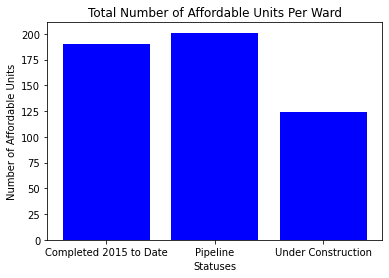

In [20]:
#create a bar graph of the number of affordable units for each development status
status = cleanedhouse['STATUS_PUBLIC']
units = cleanedhouse['TOTAL_AFFORDABLE_UNITS']

plt.bar(status, units, color='blue')
plt.title("Total Number of Affordable Units Per Ward")
plt.xlabel("Statuses")
plt.ylabel("Number of Affordable Units")
plt.show()

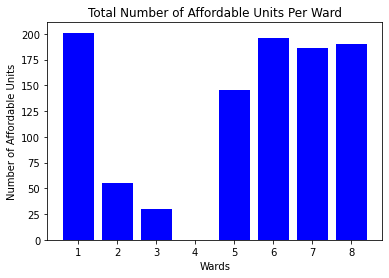

In [21]:
#create a bar graph of the number of affordable units for each ward
ward = cleanedhouse['WARD']
units = cleanedhouse['TOTAL_AFFORDABLE_UNITS']

plt.bar(ward, units, color='blue')
plt.title("Total Number of Affordable Units Per Ward")
plt.xlabel("Wards")
plt.ylabel("Number of Affordable Units")
plt.show()

##### Merge Affordable Housing Dataset with Redevelopment Plans Dataset

In [24]:
#take cleaned WDCEP development plans dataset and retrieve necessary columns and put into df
plans = cleaned1[['WARD','UNITS']]
cleanedplans = plans.dropna() #drop na values
cleanedplans

,WARD,UNITS
0,6,870.0
1,5,520.0
2,6,438.0
3,6,431.0
4,5,430.0
...,...,...
386,6,472.0
387,6,456.0
388,1,450.0
389,6,425.0


In [27]:
#take cleaned affordable housing dataset and retrieve necessary columns and put into df
aff = cleanedhouse[['WARD','TOTAL_AFFORDABLE_UNITS']]
aff

,WARD,TOTAL_AFFORDABLE_UNITS
21,7,150
28,6,23
30,8,190
51,5,36
53,5,38
...,...,...
386,5,3
438,3,30
440,6,41
441,8,130


In [29]:
#aggregate to get the count of the number of affordable units per ward again and put in df
afftotal = cleanedhouse[['WARD','TOTAL_AFFORDABLE_UNITS']].groupby(['WARD']).agg('count')
afftotal_ward = pd.DataFrame(afftotal)
afftotal_ward

,TOTAL_AFFORDABLE_UNITS
WARD,
1,9
2,4
3,5
5,20
6,29
7,6
8,3


In [32]:
##aggregate to get the sum of units per ward and put in df
devunits = cleanedplans[['WARD','UNITS']].groupby(['WARD']).agg('sum')
devunits = pd.DataFrame(devunits)
devunits

,UNITS
WARD,
1,3901.0
2,6060.0
3,2711.0
4,735.0
5,8817.0
6,29089.0
7,353.0
8,615.0


In [33]:
#merge the two dfs together
x = pd.merge(afftotal,devunits,how="inner",on="WARD")
pd.DataFrame(x)
x

,TOTAL_AFFORDABLE_UNITS,UNITS
WARD,,
1,9,3901.0
2,4,6060.0
3,5,2711.0
5,20,8817.0
6,29,29089.0
7,6,353.0
8,3,615.0


### Make graph in Tableau